## Observations and Insights 

Insight 1:


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
pharm_df = pd.merge(mouse_metadata, study_results, how='inner', on='Mouse ID')
# Display the data table for preview
pharm_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
unique_mouse = len(pharm_df['Mouse ID'].value_counts())
unique_mouse

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = pharm_df.loc[pharm_df.duplicated(subset=['Mouse ID', 'Timepoint']), ['Mouse ID', 'Timepoint']]
duplicate_mice


,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = pharm_df.loc[pharm_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = pharm_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_unique_mouse = len(pharm_df['Mouse ID'].value_counts())
clean_unique_mouse 

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# Mean calculation
stats_avg = clean_mice_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
# Median calculation
stats_median = clean_mice_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
# Variance calculation
stats_var = clean_mice_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
# Standard Deviation calculation
stats_std = clean_mice_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
# SEM(spread over time) calculation
stats_sem = clean_mice_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
# Dataframe assemblly
summary_stats_df = pd.DataFrame({
    "Average": stats_avg, 
    "Median": stats_median, 
    "Variance": stats_var, 
    "STD": stats_std, 
    "SEM/(Spread)": stats_sem
})
# To put 'Drug Regimen' in category head and to give dataframe indices
summary_stats_df = summary_stats_df.reset_index()
# Show dataframe
summary_stats_df


,Drug Regimen,Average,Median,Variance,STD,SEM/(Spread)
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
stats_df = clean_mice_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
# To put 'Drug Regimen' and 'Tumor Volume' in category head and to give dataframe indices
stats_df = stats_df.reset_index()
# Show dataframe
stats_df

Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.393463  50.909965  43.138803  6.568014  0.525862
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

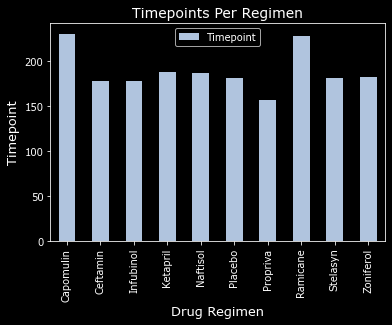

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Groupby 'Drug Regimen' and 'Timepoint'
drug_reg = clean_mice_df.groupby(['Drug Regimen']).count()['Timepoint']
# Plot Chart
chart = drug_reg.plot(kind='bar', color='lightsteelblue')
# Set Labels
chart.set_title('Timepoints Per Regimen', fontsize=14)
chart.set_ylabel('Timepoint', fontsize=13)
chart.set_xlabel('Drug Regimen', fontsize=13)
plt.legend(loc='best')
# Show chart
plt.show()

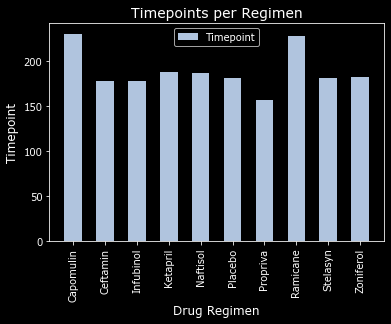

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Groupby 'Drug Regimen' and 'Timepoint'
drug_reg = clean_mice_df.groupby(['Drug Regimen']).count()['Timepoint']
# Get 'x_axis' len by the length of 'drug_reg' series
x_axis = np.arange(len(drug_reg))
ticks = [x for x in x_axis]
# Plot chart
plt.bar(x_axis, drug_reg, color='lightsteelblue', label='Timepoint', width=0.55)
# Plot ticks for x axis at a 90 deg angle
plt.xticks(ticks, drug_reg.index, rotation=90)
# Set labels
plt.title('Timepoints per Regimen', fontsize=14)
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('Timepoint', fontsize=12)
plt.legend(loc='best')
# Show plot
plt.show()

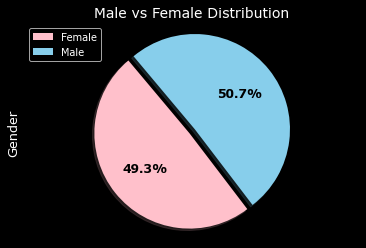

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Get count of each gender 
gender_df = clean_mice_df.groupby('Sex').count()['Mouse ID']
# Create plot vars
colors = ['pink', 'skyblue']
explode = (0.07, 0)
title = 'Male vs Female Distribution'
# Create pie chart
gender_pie = gender_df.plot(kind='pie', shadow=True, autopct="%1.1f%%", 
    explode=explode, colors=colors, textprops={'color': 'k', 'size': 12, 'weight': 600}, startangle=130);
# Set labels
gender_pie.set_ylabel('Gender', fontsize=13)
plt.title(title, fontsize=14)
plt.legend(loc='best')
# Make plot round
plt.axis('equal')
# Show plot
plt.show()


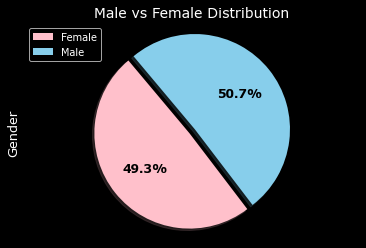

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create plot vars
colors = ["pink","skyblue"]
explode = (0.07,0)
# Plot with matplotlib
plt.pie(gender_df, explode=explode, labels=gender_df.index, colors=colors,
        autopct="%1.1f%%", shadow=True, textprops={'color': 'k', 'size': 12, 'weight': 600}, startangle=130)
# Set labels
plt.title('Male vs Female Distribution', fontsize=14)
plt.ylabel('Gender', fontsize=13)
plt.legend(loc='best')
# Make plot round
plt.axis('equal')
# Show plot
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
